In [1]:
import netsquid as ns
q1, q2 = ns.qubits.create_qubits(2)

## Computation and Mesurement

In [2]:
# default created in 0 state. what's the sate?
q1.qstate.num_qubits

1

In [3]:
print(q1.qstate.qrepr)

KetRepr(num_qubits=1,
ket=
[[1.+0.j]
 [0.+0.j]])


In [4]:
print(q2.qstate.qrepr)

KetRepr(num_qubits=1,
ket=
[[1.+0.j]
 [0.+0.j]])


In [5]:
q1.qstate == q2.qstate

False

In [6]:
ns.qubits.combine_qubits([q1,q2])
q1.qstate == q2.qstate

True

In [7]:
q1.qstate.num_qubits

2

In [8]:
print(q1.qstate.qrepr)

KetRepr(num_qubits=2,
ket=
[[1.+0.j]
 [0.+0.j]
 [0.+0.j]
 [0.+0.j]])


reduced_dm() function gives reduced density matrix (recommended way to inspect quantum state of one or more qubits)

In [9]:
ns.qubits.reduced_dm([q1,q2])

array([[1.+0.j, 0.+0.j, 0.+0.j, 0.+0.j],
       [0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j],
       [0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j],
       [0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j]])

In [10]:
ns.qubits.reduced_dm(q2)

array([[1.+0.j, 0.+0.j],
       [0.+0.j, 0.+0.j]])

mesauring qubit will by default split form its shared quantum state

In [11]:
q1.qstate.num_qubits == q2.qstate.num_qubits

True

In [12]:
q1.qstate.num_qubits

2

In [13]:
ns.qubits.measure(q1)

(0, 1.0)

In [14]:
q1.qstate.num_qubits == q2.qstate.num_qubits

True

In [15]:
q1.qstate.num_qubits

1

In [16]:
ns.qubits.reduced_dm(q1)

array([[1.+0.j, 0.+0.j],
       [0.+0.j, 0.+0.j]])

measur eoperator returns measurement result and teh probability of that measurement. discarbing qubit iwll only remove it from its shared quatnum state but also leave it stateless

In [17]:
ns.qubits.combine_qubits([q1,q2])

[Qubit('QS#0-0'), Qubit('QS#0-1')]

In [18]:
q1.qstate.num_qubits == q2.qstate.num_qubits

True

In [19]:
q1.qstate.num_qubits

2

In [20]:
ns.qubits.measure(q2,discard=True)

(0, 1.0)

In [21]:
q2.qstate is None

True

In [22]:
q1.qstate.num_qubits

1

## Qstate formalism

In [23]:
# measuring qubit automatically splits it from shared quantum state

In [24]:
from netsquid.qubits.qformalism import QFormalism

In [25]:
ns.get_qstate_formalism()

netsquid.qubits.kettools.KetRepr

In [26]:
# Change to stabilizer formalism:
ns.set_qstate_formalism(QFormalism.STAB)
ns.get_qstate_formalism()

netsquid.qubits.stabtools.StabRepr

even tho ns will attempt to convert shared quantum states when encounters incompatabile formalisms, good practice to create new qubits when chagne formalisms

In [27]:
q1, q2 = ns.qubits.create_qubits(2, no_state=True)
ns.qubits.assign_qstate([q1, q2], ns.h01)  # assign |+->
print(ns.qubits.reduced_dm(q1))
print(ns.qubits.reduced_dm(q2))

[[0.5+0.j 0.5+0.j]
 [0.5+0.j 0.5+0.j]]
[[ 0.5+0.j -0.5+0.j]
 [-0.5+0.j  0.5+0.j]]


In [28]:
# let's check if underlying qtate now uses stabilizer fomralism:

In [29]:
type(q1.qstate.qrepr)

netsquid.qubits.stabtools.StabRepr

In [30]:
q1.qstate.qrepr.check_matrix

array([[1, 0, 0, 0],
       [0, 1, 0, 0]], dtype=uint8)

In [31]:
q1.qstate.qrepr.phases

array([ 1, -1], dtype=int8)

## Operations

In [32]:
# Change to density matrix formalism:
ns.set_qstate_formalism(QFormalism.DM)
a1, a2, b1 = ns.qubits.create_qubits(3)

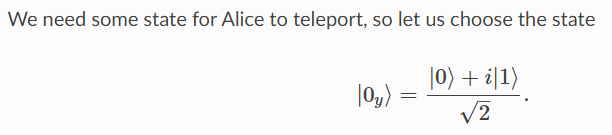

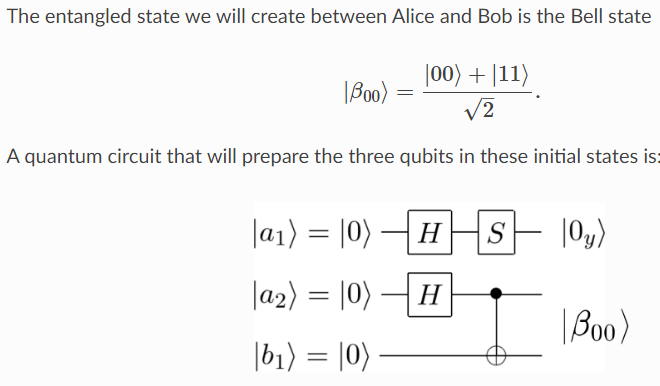

In [33]:
# put a1 into the chosen target state
ns.qubits.operate(a1, ns.H) # apply Hadamard gate to a1: |0> -> |+>
ns.qubits.operate(a1, ns.S) # apply S gate to a1: |+> -> |0_y>
print(ns.qubits.reduced_dm([a1]))
# transform a2 and b1 to the Bell state |b00> = (|00> + |11>)/sqrt(2)
ns.qubits.operate(a2, ns.H)  # apply Hadamard gate to a2
ns.qubits.operate([a2, b1], ns.CNOT)  # CNOT: a2 = control, b1 = target
print(ns.qubits.reduced_dm([a2, b1]))

[[0.5+0.j  0. -0.5j]
 [0. +0.5j 0.5+0.j ]]
[[0.5+0.j 0. +0.j 0. +0.j 0.5+0.j]
 [0. +0.j 0. +0.j 0. +0.j 0. +0.j]
 [0. +0.j 0. +0.j 0. +0.j 0. +0.j]
 [0.5+0.j 0. +0.j 0. +0.j 0.5+0.j]]


create cusotm quantum oeprators:

In [34]:
import numpy as np

# Construct a new operator using existing operators:
newOp = ns.CNOT * ((ns.X + ns.Z) / np.sqrt(2) ^ ns.I)
print(newOp.name)  # Note: CNOT == CX

# Construct a new operator using a matrix:
newOp2 = ns.qubits.Operator("newOp2", np.array([[1, 1j], [-1j, -1]])/np.sqrt(2))
assert(newOp2.is_unitary == True)
assert(newOp2.is_hermitian == True)

# Construct new operators using helper functions:
R = ns.create_rotation_op(angle=np.pi/4, rotation_axis=(1, 0, 0))
print(R.name)

# Construct a controlled operator:
CR = R.ctrl
print(CR.name)

(CX*(((X+Z)/(1.41))^I))
R_x[0.79]
CR_x[0.79]


after initializing qubits, to teleport Alice proceeds by performing Bell state measurement on her two qubits. Then she sends the two calssical bits to Bob who performs a possible correction This represented by circuit:

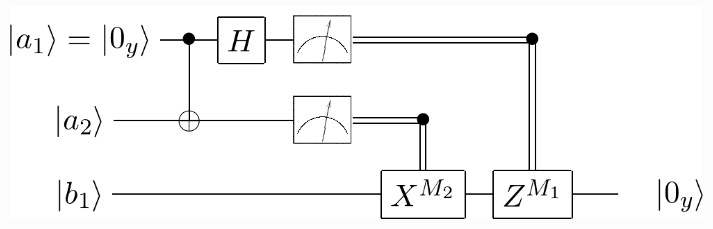

 measure function perromsprojective measurement. if no observable specified, Z used by default

In [35]:
ns.set_random_state(seed=42)  # (Ensures fixed random outcomes for our doctests)
ns.qubits.operate([a1, a2], ns.CNOT)  # CNOT: a1 = control, a2 = target
ns.qubits.operate(a1, ns.H)
# Measure a1 in the standard basis:
m1, prob = ns.qubits.measure(a1)
labels_z = ("|0>", "|1>")
print(f"Measured {labels_z[m1]} with prob {prob:.2f}")
# Measure a2 in standard basis:
m2, prob = ns.qubits.measure(a2)
print(f"Measured {labels_z[m2]} with prob {prob:.2f}")

Measured |0> with prob 0.50
Measured |1> with prob 0.50


In [36]:
# measure in Hadamrd (x)
q1, = ns.qubits.create_qubits(1)
m3, prob = ns.qubits.measure(q1, observable=ns.X, discard=True)
labels_x = ("+", "-")
print(f"Measured |{labels_x[m3]}> with prob {prob:.2f}")

Measured |-> with prob 0.50


In [37]:
# ping pong in for loop
q1, = ns.qubits.create_qubits(1)
for i in range(6):
    observable, labels = (ns.Z, ("0", "1")) if i % 2 else (ns.X, ("+", "-"))
    m, prob = ns.qubits.measure(q1, observable=observable)
    print(f"Measured |{labels[m]}> with prob {prob:.2f}")

Measured |-> with prob 0.50
Measured |0> with prob 0.50
Measured |+> with prob 0.50
Measured |0> with prob 0.50
Measured |-> with prob 0.50
Measured |1> with prob 0.50


## General measurements

In [38]:
bell_operators = []
p0, p1 = ns.Z.projectors
bell_operators.append(ns.CNOT * (ns.H ^ ns.I) * (p0 ^ p0) * (ns.H ^ ns.I) * ns.CNOT)
bell_operators.append(ns.CNOT * (ns.H ^ ns.I) * (p0 ^ p1) * (ns.H ^ ns.I) * ns.CNOT)
bell_operators.append(ns.CNOT * (ns.H ^ ns.I) * (p1 ^ p0) * (ns.H ^ ns.I) * ns.CNOT)
bell_operators.append(ns.CNOT * (ns.H ^ ns.I) * (p1 ^ p1) * (ns.H ^ ns.I) * ns.CNOT)
q1, q2 = ns.qubits.create_qubits(2)
ns.qubits.operate(q1, ns.H)
meas, prob = ns.qubits.gmeasure([q1, q2], meas_operators=bell_operators)
labels_bell = ("|00>", "|01>", "|10>", "|11>")
print(f"Measured {labels_bell[meas]} with prob {prob:.2f}")
print(q1.qstate.num_qubits)

Measured |10> with prob 0.25
2


Bob may need to apply corrections to his qubit to recover the telperted quantum state


In [39]:
if m2 == 1:
    ns.qubits.operate(b1,ns.X)
if m1 == 1:
    ns.qubits.operate(b1,ns.Z)
print(ns.qubits.reduced_dm([b1]))

[[0.5+0.j  0. -0.5j]
 [0. +0.5j 0.5+0.j ]]


In [40]:
# hwo close qubit is to desired state by measuring fidelity
fidelity = ns.qubits.fidelity(b1, ns.y0, squared=True)
print(f"Fidelity is {fidelity:.3f}")

Fidelity is 1.000


## Applying Noise

case that b1 depolarized during the Bell measurement of a1 and a2, which would cause the fidelity of the teleported state to drop

In [41]:
ns.qubits.delay_depolarize(b1, depolar_rate=1e7, delay=20)
fidelity = ns.qubits.fidelity([b1], reference_state=ns.y0, squared=True)
print(f"Fidelity is {fidelity:.3f}")

Fidelity is 0.909


In [42]:
q1, q2, q3, q4 = ns.qubits.create_qubits(4)

ns.qubits.stochastic_operate(q1,[ns.X,ns.Y,ns.Z],p_weights=(.5,.25,.25))
print(ns.qubits.reduced_dm([q1]))

ns.qubits.apply_pauli_noise(q2,p_weights=(.25,.25,.25,.25))
print(ns.qubits.reduced_dm([q2]))

ns.qubits.depolarize(q3,prob=0.8)
print(ns.qubits.reduced_dm(q3))

ns.qubits.operate(q4,ns.X)# -> |1>
ns.qubits.amplitude_dampen(q4, gamma=0.1, prob=1)
print(ns.qubits.reduced_dm([q4]))

[[0.25+0.j 0.  +0.j]
 [0.  +0.j 0.75+0.j]]
[[0.5+0.j 0. +0.j]
 [0. +0.j 0.5+0.j]]
[[0.6+0.j 0. +0.j]
 [0. +0.j 0.4+0.j]]
[[0.1+0.j 0. +0.j]
 [0. +0.j 0.9+0.j]]
